# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.

We know that the function has to integrate to 1, we compute:

$$
\int_0^b p(x;a,b) dx = H(a,b) \left( \int_0^a \frac{x}{a} dx + \int_a^b \frac{b - x}{b - a} dx \right) = 1
$$

Solving these integrals, eventually we find:

$$
H(a,b) = \frac{2}{b}
$$

- **Question 2.** Compute the expected value $\mu$ of the distribution.

We compute the expected value:

$$
\mu = \mathbb{E}[X] = \int_0^a x \cdot p(x;a,b) dx + \int_a^b x \cdot p(x;a,b) dx
$$

Substitute the expressions and normalization:

$$
\mu = \frac{2}{b} \left( \int_0^a x \cdot \frac{x}{a} dx + \int_a^b x \cdot \frac{b - x}{b - a} dx \right)
$$

Eventually we get:

$$
\mu = \frac{2}{b} \left( \frac{a^2}{3} + \frac{1}{b - a} \left( \frac{b^3}{6} - \frac{b a^2}{2} + \frac{a^3}{3} \right) \right)
$$

- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

We compute the cumulative distribution function:

$$
F(t) = \int_0^t p(x;a,b)\,dx
$$

Piecewise definition:

- For $ t < 0 $:
$$
F(t) = 0
$$

- For $ 0 \le t \le a $:
$$
F(t) = H(a,b) \cdot \int_0^t \frac{x}{a} dx = H(a,b) \cdot \frac{t^2}{2a}
$$

- For $ a < t \le b $:
$$
F(t) = H(a,b) \int_a^{a+t} \frac{b - x}{b - a} dx = H(a,b) \left( \frac{a}{2} + \frac{(b - a)^2 - (b - t)^2}{2(b - a)} \right)
$$

- For $ t > b $:
$$
F(t) = 1
$$

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

To find the median we solve:
$$
F(m) = 0.5
$$

**Case 1**: Median lies in $[0, a]$, i.e.
$$
F(a) = \frac{2}{b} \cdot \frac{a}{2} = \frac{a}{b} \ge 0.5
$$

We solve:
$$
F(m) = H(a,b) \cdot \int_0^m \frac{x}{a} dx = \frac{2}{b} \cdot \frac{m^2}{2a} = 0.5
$$

Then the median is:
$$
m = \sqrt{ \frac{a b}{2} }
$$

**Case 2**: Median lies in $[a, b]$, i.e.
$$
F(a) = \frac{a}{b} < 0.5
$$

We solve:
$$
F(m) = H(a,b) \int_a^{a+m} \frac{b - x}{b - a} dx = \frac{2}{b} \left( \frac{a}{2} + \frac{(b - a)^2 - (b - m)^2}{2(b - a)} \right) = 0.5
$$

we get:
$$
m = b - \sqrt{(b - a)^2 - (b - a)\left( \frac{b}{2} - a \right)}
$$

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

In general the mean and median are not equal because the distribution is asymmetric. Their relative positions give insight into the skewness of the distribution. The mode is where the peak of PDF is situated, in our case it is at $a$. The mean and median are both smaller than the mode. 

## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def pdf(x, a, b=20):
    H = 2 / b
    x = np.asarray(x)
    p = np.zeros_like(x)
    mask1 = (x >= 0) & (x <= a)
    mask2 = (x > a) & (x <= b)
    p[mask1] = H * (x[mask1] / a)
    p[mask2] = H * ((b - x[mask2]) / (b - a))
    return p

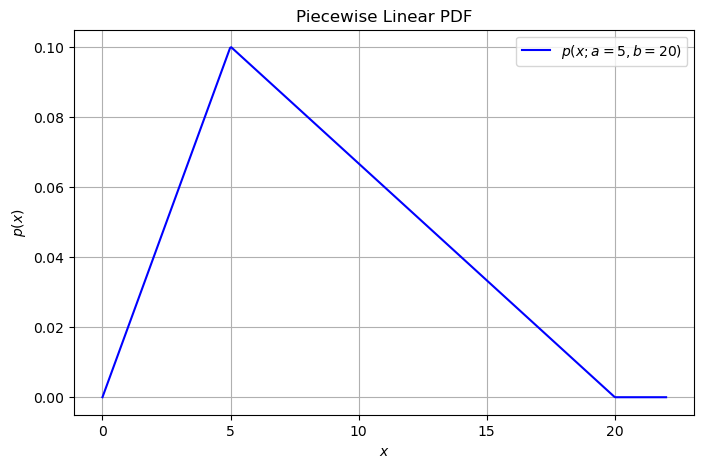

In [98]:
a = 5
b = 20

x_vals = np.linspace(0, b + 2, 500)
y_vals = pdf(x_vals, a, b)

# Plot the PDF
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=fr'$p(x; a={a}, b={b})$', color='blue')
plt.title("Piecewise Linear PDF")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid(True)
plt.legend()
plt.show()

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

In [99]:
data = np.load("fixed_b.npy")
n = len(data)
#show data structure
print(f"Data structure: {data.shape}")
print(f"Number of sample points (n): {n}")

Data structure: (100,)
Number of sample points (n): 100


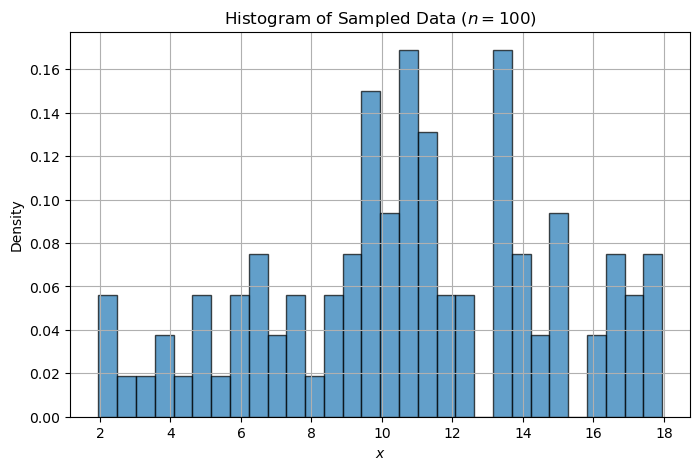

In [100]:
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of Sampled Data ($n = {n}$)")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.grid(True)
plt.show()

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$. 

In [101]:
x_bar = np.mean(data)
m_bar = np.median(data)

print(f"Empirical mean (x̄): {x_bar:.4f}")
print(f"Empirical median (m̄): {m_bar:.4f}")

Empirical mean (x̄): 10.7398
Empirical median (m̄): 10.7005


- **Question 9.** Use the expression of the expected value you computedabove to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

We derived the expected value (mean) of the distribution earlier:

$$\mu(a) = \frac{2}{b} \left( \frac{a^2}{3} + \frac{1}{b - a} \left( \frac{b^3}{6} - \frac{b a^2}{2} + \frac{a^3}{3} \right) \right).$$

Given an empirical mean $\bar x$, an estimator for $a$ can be obtained by inverting this mapping:

$$\hat a_{\text{mean}} = \mu^{-1}(\bar x) ,$$
which in general must be computed numerically (solve $\mu(a)=\bar x$ for $a\in(0,b)$).

For the median, recall the piecewise formula:

If the median lies in $[0,a]$ (i.e. $a/b \ge 1/2$), then the population median is $m = \sqrt{ab/2}$. Inverting gives

$$\hat a_{\text{median}} = \frac{2 \bar m^2}{b} \quad\text{(when }\hat a_{\text{median}}\ge b/2\text{).}$$

If the median lies in $[a,b]$ (i.e. $a/b < 1/2$), then the population median is the root of a quadratic expression (see notebook). In practice we can compute $\hat a_{\text{median}}$ by solving the appropriate equation numerically given $\bar m$.

- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

In [102]:
from scipy.optimize import root_scalar

# Function to estimate a from the mean
def est_a_mean(x_bar, b=20):
    def mu(a):
        if a <= 0 or a >= b:
            return np.inf  # avoid invalid region
        term1 = (a**2) / 3
        term2 = (b**3) / 6 - b * a**2 / 2 + a**3 / 3
        return (2 / b) * (term1 + term2 / (b - a))

    # solve mu(a) = x_bar
    sol = root_scalar(lambda a: mu(a) - x_bar, bracket=[1e-3, b - 1e-3], method='brentq')
    return sol.root if sol.converged else None


def est_a_median(m_bar, b=20):
    # Case 1: m_bar >= b/2
    if m_bar >= b / 2:
        return (2 * m_bar**2) / b
    else:
        # Solve nonlinear equation numerically
        def median_eq(a):
            if a <= 0 or a >= b:
                return np.inf
            term = (a / 2) + ((b - a)**2 - (b - m_bar)**2) / (2 * (b - a))
            return (2 / b) * term - 0.5

        sol = root_scalar(median_eq, bracket=[1e-3, b - 1e-3], method='brentq')
        return sol.root if sol.converged else None

In [103]:
a_mean_hat = est_a_mean(x_bar, b=20)
a_median_hat = est_a_median(m_bar, b=20)
print(f"â_mean estimate: {a_mean_hat:.4f}")
print(f"â_median estimate: {a_median_hat:.4f}")

â_mean estimate: 12.2193
â_median estimate: 11.4501


 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

$$\mathcal{L}(a) = \sum_{i=1}^{n} \log p(x_i; a, b)$$

$$\mathcal{L}(a) = \sum_{x_i \le a} \log\left(\frac{2}{b} \cdot \frac{x_i}{a}\right) + \sum_{x_i > a} \log\left(\frac{2}{b} \cdot \frac{b - x_i}{b - a}\right)$$

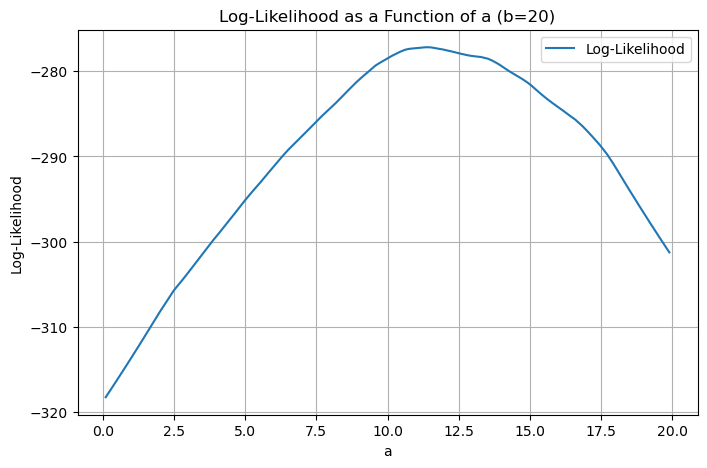

In [104]:
def log_likelihood(a, x, b=20):
    if a <= 0 or a >= b:
        return -np.inf  # invalid 'a'

    H = 2 / b
    x = np.asarray(x)

    in_left = x <= a
    in_right = (x > a) & (x <= b)

    if np.any((x < 0) | (x > b)):
        return -np.inf  # out-of-bounds samples

    log_probs = np.zeros_like(x)
    log_probs[in_left] = np.log(H) + np.log(x[in_left]) - np.log(a)
    log_probs[in_right] = np.log(H) + np.log(b - x[in_right]) - np.log(b - a)

    return np.sum(log_probs)

# Evaluate over a range of a values
a_vals = np.linspace(0.1, b - 0.1, 300)
log_likelihoods = [log_likelihood(a, data, b) for a in a_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(a_vals, log_likelihoods, label="Log-Likelihood")
plt.xlabel("a")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood as a Function of a (b=20)")
plt.grid(True)
plt.legend()
plt.show()

 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

In [105]:
from scipy.optimize import minimize_scalar
def est_a_mle(data, b=20):
    eps = 1e-3
    res = minimize_scalar(lambda a: -log_likelihood(a, data, b),
                          bounds=(eps, b - eps),
                          method='bounded')
    return res.x
a_mle = est_a_mle(data, 20)
print(f"MLE of a: {a_mle:.4f}")

MLE of a: 11.3658


- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

In [106]:
n_boot = 1000
# Bootstrap estimates
a_mean_bootstrap = []
a_median_bootstrap = []
a_mle_bootstrap = []

for _ in range(n_boot):
    resample = np.random.choice(data, size=len(data), replace=True)

    x_bar = np.mean(resample)
    m_bar = np.median(resample)
    max_sample = np.max(resample)  # MLE estimate

    a_mean_bootstrap.append(est_a_mean(x_bar, b=b))
    a_median_bootstrap.append(est_a_median(m_bar, b=b))
    a_mle_bootstrap.append(max_sample)

def ci(arr):
    return np.percentile(arr, [2.5, 97.5])

ci_mean = ci(a_mean_bootstrap)
ci_median = ci(a_median_bootstrap)
ci_mle = ci(a_mle_bootstrap)

# Display results
print(f"95% CI for a_mean:   {ci_mean}")
print(f"95% CI for a_median: {ci_median}")
print(f"95% CI for a_MLE:    {ci_mle}")

95% CI for a_mean:   [ 9.82605225 14.49226608]
95% CI for a_median: [10.12821096 13.28244755]
95% CI for a_MLE:    [17.45775695 17.95078353]


 - **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.
 

The Fisher Information is defined as:

$$
\mathcal{I}(a) = \mathbb{E} \left[ \left( \frac{\partial}{\partial a} \log p(x; a, b) \right)^2 \right]
$$

In interval $x \in [0, a]$:

$$
p(x; a, b) = \frac{2x}{ab}
$$

Then:

$$
\log p(x; a, b) = \log(2x) - \log(ab)
\quad \Rightarrow \quad 
\frac{\partial}{\partial a} \log p(x; a, b) = -\frac{1}{a}
$$

So:

$$
\left( \frac{\partial}{\partial a} \log p(x; a, b) \right)^2 = \frac{1}{a^2}
$$

Integrating over $[0, a]$:

$$
\int_0^a p(x;a,b) \frac{1}{a^2} dx
= \frac{1}{a^2} \int_0^a \frac{2x}{ab} dx
= \frac{2}{a^3 b} \int_0^a x dx
= \frac{2}{a^3 b} \cdot \frac{a^2}{2} = \frac{1}{a b}
$$

In interval $x \in [a, b]$:

$$
p(x; a, b) = \frac{2(b - x)}{b(b - a)}
$$

Then:

$$
\log p(x; a, b) = \log(2(b - x)) - \log(b(b - a))
\quad \Rightarrow \quad 
\frac{\partial}{\partial a} \log p(x; a, b) = \frac{1}{b - a}
$$

So:

$$
\left( \frac{\partial}{\partial a} \log p(x; a, b) \right)^2 = \frac{1}{(b - a)^2}
$$

Integrating over $[a, b]$:

$$
\int_a^b p(x;a,b) \frac{1}{(b - a)^2} dx
= \frac{1}{(b - a)^2} \int_a^b \frac{2(b - x)}{b(b - a)} dx
= \frac{2}{b(b - a)^3} \int_a^b (b - x) dx
$$

Since:

$$
\int_a^b (b - x) dx = \frac{(b - a)^2}{2}
$$

We have:

$$
\int_a^b p(x;a,b) \left( \frac{\partial}{\partial a} \log p(x;a,b) \right)^2 dx
= \frac{2}{b(b - a)^3} \cdot \frac{(b - a)^2}{2} = \frac{1}{b(b - a)}
$$

Adding both contributions:

$$
\mathcal{I}(a) = \frac{1}{a b} + \frac{1}{b(b - a)} = \frac{1}{b} \left( \frac{1}{a} + \frac{1}{b - a} \right)
$$

- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

### Question 15 – Estimating $a_{\text{Jeff}}$ using the Jeffreys Posterior

We begin with:

#### 1. Jeffreys Prior

The Jeffreys prior is proportional to the square root of the Fisher Information:

$$
\pi(a) \propto \sqrt{\mathcal{I}(a)} \propto \sqrt{ \frac{1}{b} \left( \frac{1}{a} + \frac{1}{b - a} \right) }
$$

So the Jeffreys prior is:

$$
\pi(a) \propto \sqrt{ \frac{1}{a} + \frac{1}{b - a} }
$$


Given a sample $x_1, \dots, x_n$, the (unnormalized) **posterior** is:

$$
\log p(a \mid x_1, \dots, x_n) = \log L(a) + \log \pi(a)
$$

Where

- Log-likelihood:

$$
\log L(a) = \sum_{i=1}^n \log p(x_i; a, b)
$$

- Log-prior:

$$
\log \pi(a) = \frac{1}{2} \log \left( \frac{1}{a} + \frac{1}{b - a} \right)
$$


To find $a_{\text{Jeff}}$, we **maximize** the posterior:

$$
a_{\text{Jeff}} = \arg\max_{a \in (0, b)} \left[ \log L(a) + \frac{1}{2} \log \left( \frac{1}{a} + \frac{1}{b - a} \right) \right]
$$

In [107]:
def log_jeffreys_prior(a, b):
    if a <= 0 or a >= b:
        return -np.inf
    return 0.5 * np.log(1/a + 1/(b - a))

# Posterior (log)
def neg_log_posterior(a, x, b):
    return -(log_likelihood(a, x, b) + log_jeffreys_prior(a, b))

# MAP estimate
def est_a_jeff(data, b=20):
    eps = 1e-3
    res = minimize_scalar(lambda a: -log_likelihood(a, data, b),
                          bounds=(eps, b - eps),
                          method='bounded')
    return res.x
a_jeff = est_a_jeff(data, 20)
print(f"Jeffreys MAP estimate: a_jeff = {a_jeff:.4f}")

Jeffreys MAP estimate: a_jeff = 11.3658


In [108]:
B = 1000
alpha = 0.05
estimates = []
n = len(data)
for _ in range(B):
    x_resample = np.random.choice(data, size=n, replace=True)
    res = minimize_scalar(neg_log_posterior, bounds=(1e-3, b - 1e-3),
                            args=(x_resample, b), method='bounded')
    if res.success:
        estimates.append(res.x)
lower = np.percentile(estimates, 100 * alpha / 2)
upper = np.percentile(estimates, 100 * (1 - alpha / 2))
ci_jeff = (lower, upper)
print(f"95% CI for a_jeff: [{ci_jeff[0]:.4f}, {ci_jeff[1]:.4f}]")

95% CI for a_jeff: [10.0639, 13.8467]


All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [109]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

Since the distribution $p(x; a, b)$ is defined piecewise, we can sample from each part using inverse transform sampling because the CDFs are available in closed-form.

In [110]:
def sample_p(a, b, size=1):
    u = np.random.rand(size)
    threshold = a / b  # P(X <= a)

    samples = np.zeros(size)
    idx1 = u <= threshold
    idx2 = ~idx1

    # Case 1: sample from [0, a]
    u1 = u[idx1]
    samples[idx1] = np.sqrt(a * b * u1)

    # Case 2: sample from [a, b]
    u2 = u[idx2]
    samples[idx2] = b - np.sqrt((1 - u2) * (b - a) * b)

    return samples

Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


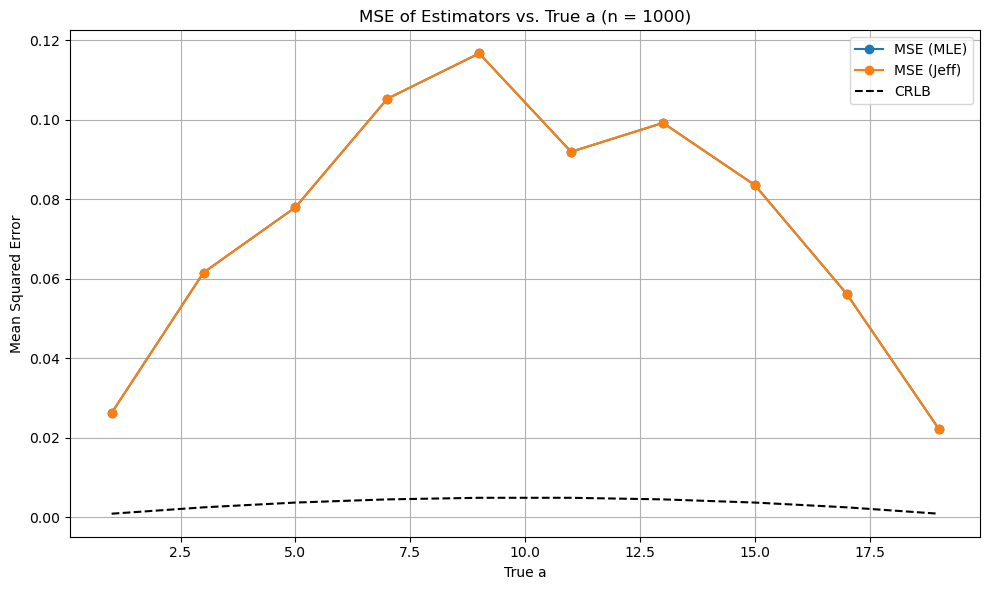

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

b = 20
n = 1000
num_trials = 300
a_values = np.linspace(1, 19, 10) 

mse_mle = []
mse_jeff = []
crlb = []

for a in tqdm(a_values):
    errors_mle = []
    errors_jeff = []

    for _ in range(num_trials):
        data_ = sample_p(a, b, size=n)

        x_bar = np.mean(data_)
        m_bar = np.median(data_)

        a_hat_mle = est_a_mle(data_, b)
        a_hat_jeff = est_a_jeff(data_, b)

        errors_mle.append((a_hat_mle - a) ** 2)
        errors_jeff.append((a_hat_jeff - a) ** 2)

    # Average MSEs
    mse_mle.append(np.mean(errors_mle))
    mse_jeff.append(np.mean(errors_jeff))

    # CRLB
    I_a = 1 / a + 1 / (b - a)
    crlb.append(1 / (n * I_a))

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(a_values, mse_mle, label="MSE (MLE)", marker="o")
plt.plot(a_values, mse_jeff, label="MSE (Jeff)", marker="o")
plt.plot(a_values, crlb, label="CRLB", linestyle="--", color="black")

plt.xlabel("True a")
plt.ylabel("Mean Squared Error")
plt.title("MSE of Estimators vs. True a (n = 1000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

The Jeffreys prior is proportional to the square root of the Fisher information, which in this case is:

$$\pi(a) \propto \sqrt{ \frac{1}{a} + \frac{1}{b-a} }$$

This prior makes the MAP estimate very sensitive to noise in the tails and the variance is large near the edges of the interval, even though Fisher information is large there — this breaks the usual intuition behind Jeffreys priors.

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

Number of samples (n): 10000


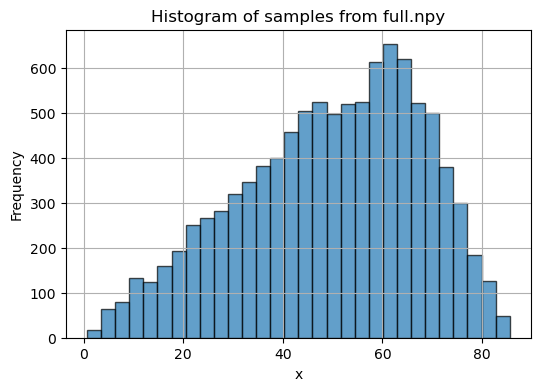

In [112]:
full_data = np.load("full.npy")

# Compute number of samples
n = len(full_data)
print(f"Number of samples (n): {n}")

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(full_data, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of samples from full.npy")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


To maximize the likelihood, we want the triangle distribution to be as tall and narrow as possible while still covering all the data points. Therefore, 
$$\hat{a}_{\text{ML}} = \min(x_1, x_2, \dots, x_n)$$
$$\hat{b}_{\text{ML}} = \max(x_1, x_2, \dots, x_n)$$

In [113]:
a_mle = np.min(full_data)
b_mle = np.max(full_data)

print(f"MLE estimate: a_ML = {a_mle:.4f}, b_ML = {b_mle:.4f}")

MLE estimate: a_ML = 0.6837, b_ML = 85.5804


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

In [114]:
# Bootstrap for confidence intervals
n_boot = 1000
n = len(full_data)
a_samples = []
b_samples = []
for _ in range(n_boot):
    resample = np.random.choice(data, size=n, replace=True)
    a_samples.append(np.min(resample))
    b_samples.append(np.max(resample))


a_boot, b_boot = np.array(a_samples), np.array(b_samples)

# Compute 95% confidence intervals
a_ci = np.percentile(a_boot, [2.5, 97.5])
b_ci = np.percentile(b_boot, [2.5, 97.5])

print(f"95% CI for a: [{a_ci[0]:.4f}, {a_ci[1]:.4f}]")
print(f"95% CI for b: [{b_ci[0]:.4f}, {b_ci[1]:.4f}]")

95% CI for a: [1.9557, 1.9557]
95% CI for b: [17.9508, 17.9508]


So if we round up to the nearest integer, the code is 0218

- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?

Not really, the mean-based estimator only works well if $b$ is known or well-estimated. It is sensitive to skewness.

The median-based one neigher, because the function of $a$ and $b$ is piece wise, making it unstable near $a = b/2$.

This makes the maximum likelihood best overall. It uses all the sample information and has optimal properties (efficiency, consistency).
